## Sklearn for preprocessing

**sklearn** can be a good option for preprocessing data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Normalizing 

> (x-x_min)/(x_max - x_min)

In [2]:
data = np.random.randint(0,100,(10,2))
data

array([[85, 57],
       [57, 96],
       [41, 55],
       [65, 71],
       [54, 34],
       [62, 41],
       [90, 28],
       [10, 42],
       [81, 34],
       [48, 12]])

In [3]:
scale_model = MinMaxScaler()
scale_model

MinMaxScaler(copy=True, feature_range=(0, 1))

In [4]:
#fit and transform are usually separate, because we fit on training data and tranform on test data
scale_model.fit_transform(data)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.9375    , 0.53571429],
       [0.5875    , 1.        ],
       [0.3875    , 0.51190476],
       [0.6875    , 0.70238095],
       [0.55      , 0.26190476],
       [0.65      , 0.3452381 ],
       [1.        , 0.19047619],
       [0.        , 0.35714286],
       [0.8875    , 0.26190476],
       [0.475     , 0.        ]])

### Splitting data

In [5]:
features = np.random.randint(0,101,(50,3))
labels = np.random.randint(0,5,(50,1))
data = np.concatenate((features,labels),axis=1)

In [6]:
df = pd.DataFrame(data,columns = ['f1','f2','f3','labels'])
df[:10]

,f1,f2,f3,labels
0,48,81,1,2
1,31,21,55,2
2,86,99,85,4
3,50,37,76,3
4,75,83,46,1
5,20,49,34,4
6,52,29,21,1
7,96,84,47,4
8,26,6,16,3
9,74,29,97,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=42)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33, 3), (33, 1), (17, 3), (17, 1))

### Generating random datasets

In [10]:
from sklearn.datasets import make_blobs

In [13]:
data = make_blobs(n_samples=20,n_features=2,centers=2,random_state=75) #centers=[number of classes]
data

(array([[ 8.30341694,  9.76434191],
        [ 2.00890845, -9.78471782],
        [ 7.61394406,  9.28514328],
        [ 1.99243535, -8.85885722],
        [ 2.72532584, -7.51956557],
        [ 0.61463602, -9.51908883],
        [ 1.96322881, -9.50169117],
        [ 7.17921284,  8.27086876],
        [ 1.85582689, -6.74473432],
        [ 9.51455821,  8.58892969],
        [ 7.45306641,  9.10905389],
        [ 9.42946502,  9.76901785],
        [ 7.80145246,  9.16870527],
        [ 6.44782446,  8.22405082],
        [ 9.26944802,  8.42126196],
        [ 0.65582768, -9.5920878 ],
        [ 2.09335725, -7.66278316],
        [ 7.7804942 , 10.01469484],
        [ 1.82921897, -9.86956281],
        [ 1.57961049, -8.17089971]]),
 array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]))

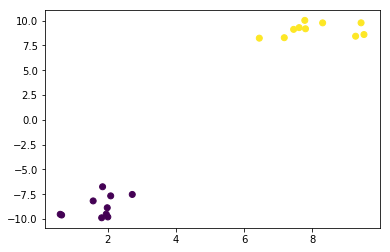

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(data[0][:,0],data[0][:,1],c=data[1]) 

### One Hot Encoding

In [4]:
diabetes = pd.read_csv("files/pima-indians-diabetes.csv")
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


> **Depricated:**

>> Use **Label encoder** to change String labels to Integer. And then use **OneHotEncoder**

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Change characerts in **Groups** to Integers with **LabelEncoder** 

In [5]:
cols = diabetes.columns
arr = diabetes.values

le = LabelEncoder()
le_fit = le.fit(arr[:,9]) #fit is used on test data
arr[:,9] = le_fit.transform(arr[:,9])
pd.DataFrame(arr,columns=cols).head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0,0.500745,0.234415,50,1,1
1,1,0.427136,0.540984,0.292929,0,0.396423,0.116567,31,0,2
2,8,0.919598,0.52459,0,0,0.347243,0.253629,32,1,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,21,0,1
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,2


Change **Age** and **Group** to **OneHotEncoding**

In [6]:
oe = OneHotEncoder(categorical_features=[7,9]) #Column numbers on which transformation should be applied
oe_fit = oe.fit(arr) #fir is used on test data
arr_new = oe_fit.transform(arr).toarray()
pd.DataFrame(arr_new).head()

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,1.0


**PROBLEM**: The Categories considered for **AGE** are only the ones encountered in training data. If we get a new age, the code breaks

In [7]:
oe_fit.categories_

[array([21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
        34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
        47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
        60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 72., 81.]),
 array([0., 1., 2., 3.])]

> **Prefered method :**

>> Using **Column Transformers**. Also eliminated the need for Label encoders

In [8]:
from sklearn.compose import ColumnTransformer

In [9]:
cols = diabetes.columns
arr = diabetes.values

#Specify OneHOtEncoders separately for each column. To manually specify categories, use categories option
#9 ==> Group
#7 ==> Age
colT = ColumnTransformer([("1",OneHotEncoder(),[9]),("2",OneHotEncoder(categories=[np.arange(0,100,1)]),[7])])

In [11]:
colT_fit = colT.fit(arr)

Now you can see all the specified categories have been encoded

In [13]:
np.array(colT_fit.get_feature_names())

array(['1__x0_A', '1__x0_B', '1__x0_C', '1__x0_D', '2__x0_0', '2__x0_1',
       '2__x0_2', '2__x0_3', '2__x0_4', '2__x0_5', '2__x0_6', '2__x0_7',
       '2__x0_8', '2__x0_9', '2__x0_10', '2__x0_11', '2__x0_12',
       '2__x0_13', '2__x0_14', '2__x0_15', '2__x0_16', '2__x0_17',
       '2__x0_18', '2__x0_19', '2__x0_20', '2__x0_21', '2__x0_22',
       '2__x0_23', '2__x0_24', '2__x0_25', '2__x0_26', '2__x0_27',
       '2__x0_28', '2__x0_29', '2__x0_30', '2__x0_31', '2__x0_32',
       '2__x0_33', '2__x0_34', '2__x0_35', '2__x0_36', '2__x0_37',
       '2__x0_38', '2__x0_39', '2__x0_40', '2__x0_41', '2__x0_42',
       '2__x0_43', '2__x0_44', '2__x0_45', '2__x0_46', '2__x0_47',
       '2__x0_48', '2__x0_49', '2__x0_50', '2__x0_51', '2__x0_52',
       '2__x0_53', '2__x0_54', '2__x0_55', '2__x0_56', '2__x0_57',
       '2__x0_58', '2__x0_59', '2__x0_60', '2__x0_61', '2__x0_62',
       '2__x0_63', '2__x0_64', '2__x0_65', '2__x0_66', '2__x0_67',
       '2__x0_68', '2__x0_69', '2__x0_70', '2__x0_71

In [14]:
tr = colT_fit.transform(arr).toarray() #Returns just the transformed cols
tr.shape, arr.shape

((768, 104), (768, 10))

ColumnTransforms returns only the transformed columns. So we have to drop the old columns from the original array and concatenate it with the transformed columns

In [15]:
arr_new = np.concatenate((arr[:,[0,1,2,3,4,5,6,8]],tr),axis=1) #specify all columns excetp 7 and 9
arr_new.shape

(768, 112)

In [16]:
pd.DataFrame(arr_new).head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,6,0.743719,0.590164,0.353535,0,0.500745,0.234415,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.427136,0.540984,0.292929,0,0.396423,0.116567,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0.919598,0.52459,0,0,0.347243,0.253629,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,1,0,0,...,0,0,0,0,0,0,0,0,0,0
